In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# load and pre-process the data
data = pd.read_csv( 'lda_data.csv')
y = data.iloc[:,-1].values
X = data.iloc[:,:-1].values

In [3]:
#Question 1) Check the assumptions that linear discriminant analysis makes and decide whether its use is justified.
#LDA assumptions are:
# 1-That each feature has the same variance,that values of each variable vary around
#the mean by the same amount on average.
# 2-That the data is Gaussian, that each variable is is shaped like a bell curve when plotted.
print(np.var(X[0]))
print(np.var(X[1]))
# By printing the two variances we notice that they are close to each other
# The following plot confirms that by showing that the two features have the same shape

0.26815861944827346
0.30498489738609563


<function matplotlib.pyplot.show(close=None, block=None)>

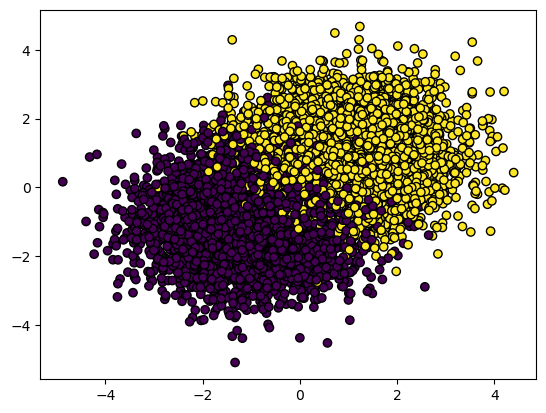

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show

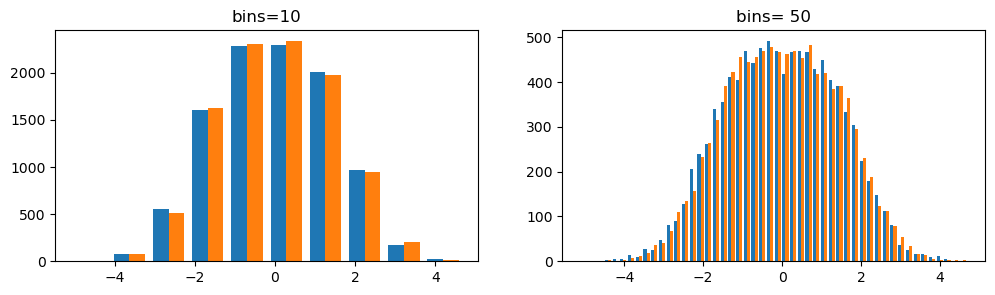

In [5]:
# 2- This plot shows that the data is gaussian, in other term, it follows a normal distribution
# see the bell curve
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist(X, bins=10)
plt.title('bins=10')
plt.subplot(122)
plt.hist(X, bins=50)
plt.title('bins= 50')
plt.show()

In [6]:
# Question 2) Let's train our model using sklearn lda
X_train, X_test, y_train, y_test = train_test_split(X, y)
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [7]:
# Question 3) The accuracy of the model on the held back test set:
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9256


In [8]:
# Question 4) The empirical model risk using 0 − 1 loss on the same set as in subtask 3
zero_one_loss(y_test, y_pred, normalize=True)

0.07440000000000002

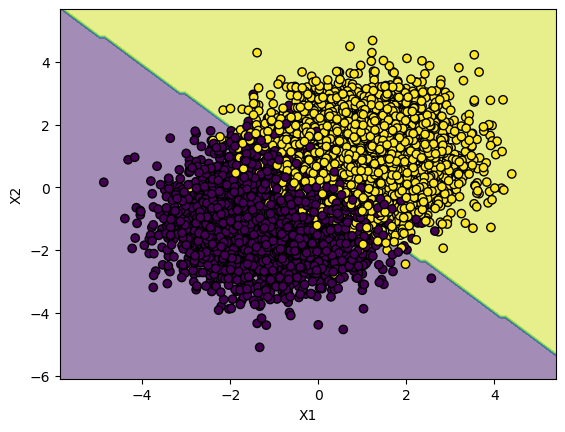

In [9]:
# Question 5) According to the following plot, we can clearly see that
# the model comes close to the minimal risk achievable and fulfill the assumptions

disp = DecisionBoundaryDisplay.from_estimator(
     lda, X, response_method="predict",
    xlabel="X1", ylabel="X2",
     alpha=0.5,)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

plt.show()